In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd 


In [112]:
def exp(x,a,b,c):
    return np.exp(-x/b)*a+c
def frontselect(lista, fronte=0):
    result = []
    for i in lista:
        if i[2]==fronte:
            result.append(i)
    return result
def convtime(x, a=1.041, b= 130):
    return a*x+b

0 leading
1 trailing

In [113]:
df = pd.DataFrame(columns= ["Canale 0","Canale 3","Canale 4","Canale 6","Canale 8" ])
fname = r"C:\Users\Lorenzo\Desktop\lab 5\acquisizione dati 3\prima presa dati.txt"
file = open(fname, "r")
n = 0
q = 0
col = 0
car = 0
locdict = {}
events = []
for f in file: 
    #print(f)
    #print(df)
    if q ==4:#parte di programma che mette il dizionario nella lista
        k = locdict.keys()
        for h in k:
            lista = locdict[h]
            lista_int= [int(y) for y in lista]
            events.append(lista_int)
        #for nr in k: ci ho un po' provato a mettere nel dataframe, senza successo. Per ora ci basta pensare alla lista
            
           # try:
           #     print("GOING")
           #     print(locdict[nr])
           #     print(df)
           #     df.loc[len(df), "event"+str(nr)] = locdict[nr]
           # except KeyError:
           #     print("AIUTO")
           #     cose = [np.nan for i in range(len(df.index))]
           #     toadd = cose+locdict[nr]
           #     title = "event "+str(nr)
           #     df[title] = toadd
                
        locdict = {}
        q = 0
        col =0
    for i in range(len(f)):
        #print(locdict)
        #print("f_i="+str(f[i]))
        #print("col="+str(col))
        #print("car="+str(car))
        #print("q"+str(q))
        if f[i] == "\n":
            q+=1
            col = 0
            car = 0            
            n+=1
            break
        elif f[i] == "\t":
            col += 1
            car =0 
        else:
            if car ==0 and q == 0:
                locdict[col]=[f[i]]
                car= 1
            elif car ==0:
                locdict[col].append(f[i])
                car +=1
            else:
                #print(locdict)
                locdict[col][q]+=f[i]
                car+=1
                
                
            

file.close()


In [114]:

dict_tot= {}
for ev in events:
    ev[3]= convtime(ev[3])
    if ev[1] not in dict_tot.keys():
        dict_tot[ev[1]]= [ev]
    else:
        dict_tot[ev[1]].append(ev)

## Legenda per i vari canali
* 0 Up
* 3 CsI
* 4 Down
* 6 Coincidenza (110)
* 8 Coincidenza (01X)

## Scintillatore up

leading


In [126]:
times_all=[]
for i in dict_tot.keys():
    for j in dict_tot[i]:
        times_all.append(j[3])

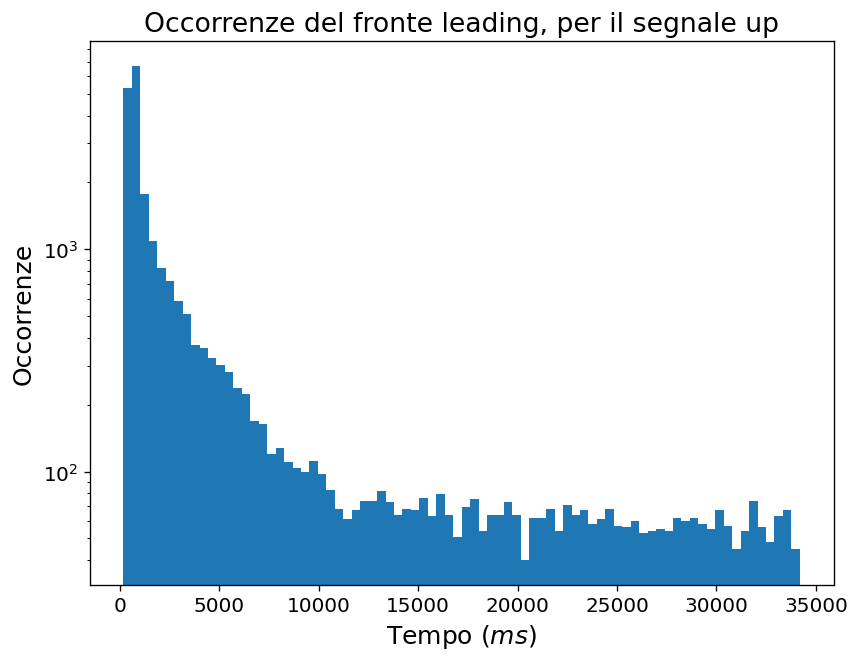

In [127]:
plt.figure(figsize=(8,6), dpi = 120)
plt.yscale("log")
plt.xlabel("Tempo ($ms$)", fontsize = 15)
plt.ylabel("Occorrenze", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
up_0 = frontselect(dict_tot[0],0)
up0_t = [i[3] for i in up_0]
plt.title("Occorrenze del fronte leading, per il segnale up", fontsize = 16)
yup0,xup0, oup0 = plt.hist(up0_t, bins =80)


In [129]:
xup0

array([  186.214  ,   611.30635,  1036.3987 ,  1461.49105,  1886.5834 ,
        2311.67575,  2736.7681 ,  3161.86045,  3586.9528 ,  4012.04515,
        4437.1375 ,  4862.22985,  5287.3222 ,  5712.41455,  6137.5069 ,
        6562.59925,  6987.6916 ,  7412.78395,  7837.8763 ,  8262.96865,
        8688.061  ,  9113.15335,  9538.2457 ,  9963.33805, 10388.4304 ,
       10813.52275, 11238.6151 , 11663.70745, 12088.7998 , 12513.89215,
       12938.9845 , 13364.07685, 13789.1692 , 14214.26155, 14639.3539 ,
       15064.44625, 15489.5386 , 15914.63095, 16339.7233 , 16764.81565,
       17189.908  , 17615.00035, 18040.0927 , 18465.18505, 18890.2774 ,
       19315.36975, 19740.4621 , 20165.55445, 20590.6468 , 21015.73915,
       21440.8315 , 21865.92385, 22291.0162 , 22716.10855, 23141.2009 ,
       23566.29325, 23991.3856 , 24416.47795, 24841.5703 , 25266.66265,
       25691.755  , 26116.84735, 26541.9397 , 26967.03205, 27392.1244 ,
       27817.21675, 28242.3091 , 28667.40145, 29092.4938 , 29517

In [133]:
lim = 10000
yup0_sel =[]
for i in up0_t:
    if i<lim:
        yup0_sel.append(i)

Text(0.5, 1.0, 'Occorrenze del fronte leading, per il segnale up (<10000 ms)')

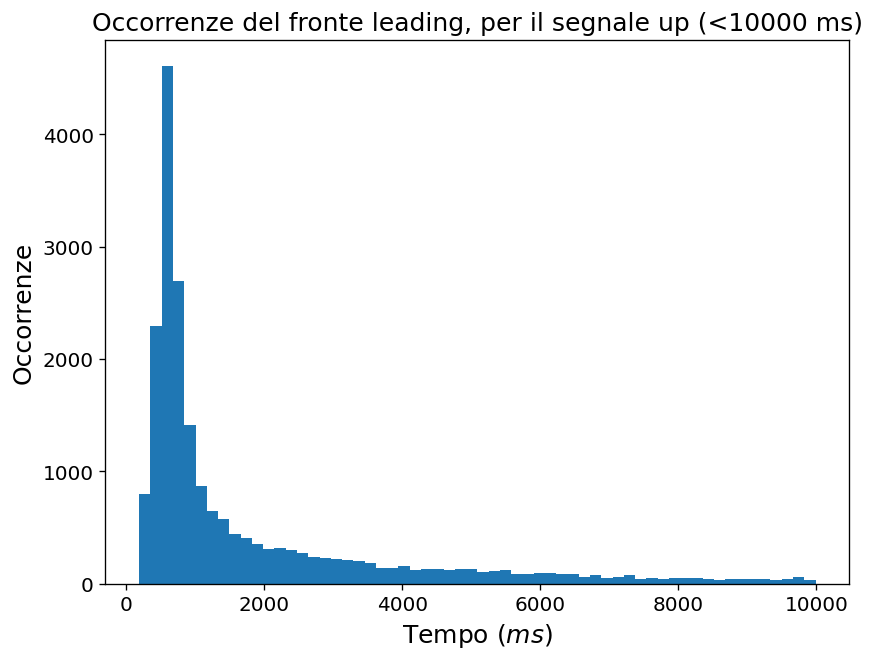

In [134]:
plt.figure(figsize=(8,6), dpi = 120)
plt.xlabel("Tempo ($ms$)", fontsize = 15)
plt.ylabel("Occorrenze", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
yselup0, xselup0, qqqqq = plt.hist(yup0_sel, bins = 60)
plt.title("Occorrenze del fronte leading, per il segnale up (<"+str(lim)+" ms)", fontsize = 15)


In [136]:
sum(yselup0)/sum(yup0)

0.8512833209540315

trailing


In [137]:
times_all=[]
for i in dict_tot.keys():
    for j in dict_tot[i]:
        times_all.append(j[3])

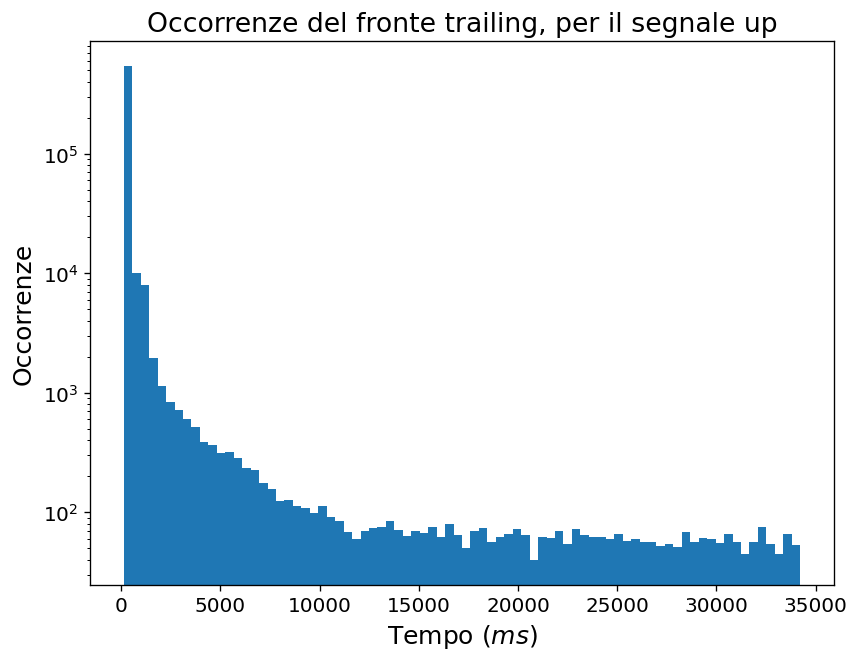

In [138]:
plt.figure(figsize=(8,6), dpi = 120)
plt.yscale("log")
plt.xlabel("Tempo ($ms$)", fontsize = 15)
plt.ylabel("Occorrenze", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
up_1 = frontselect(dict_tot[0],1)
up1_t = [i[3] for i in up_1]
plt.title("Occorrenze del fronte trailing, per il segnale up", fontsize = 16)
yup1,xup1, oup1 = plt.hist(up1_t, bins =80)


In [142]:
lim = 600
yup1_sel =[]
for i in up1_t:
    if i<lim:
        yup1_sel.append(i)

Text(0.5, 1.0, 'Occorrenze del fronte trailing, per il segnale up (<600 ms)')

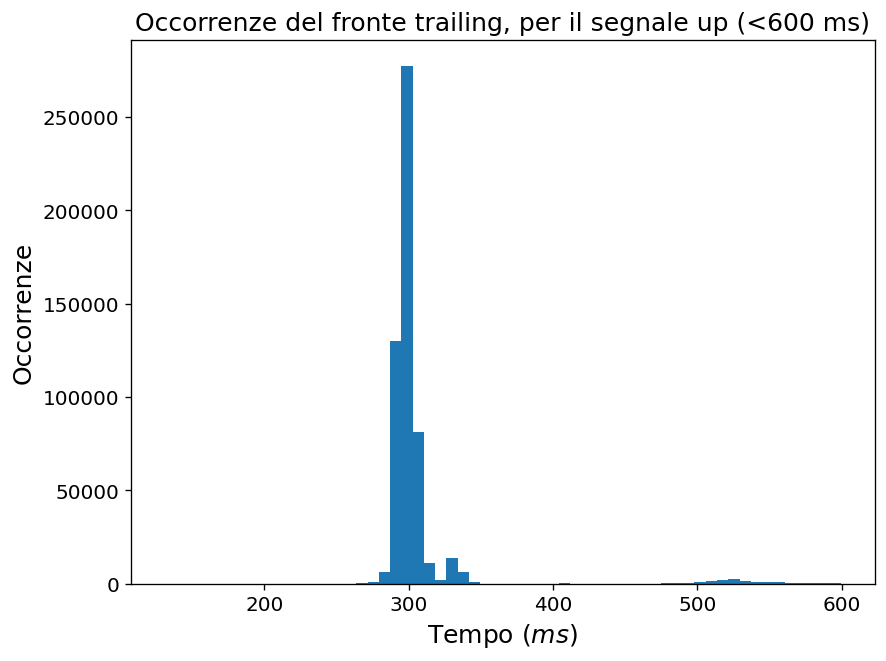

In [143]:
plt.figure(figsize=(8,6), dpi = 120)
plt.xlabel("Tempo ($ms$)", fontsize = 15)
plt.ylabel("Occorrenze", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
yselup1, xselup1, qqqqq1 = plt.hist(yup1_sel, bins = 60)
plt.title("Occorrenze del fronte trailing, per il segnale up (<"+str(lim)+" ms)", fontsize = 15)


In [144]:
sum(yselup1)/sum(yup1)

0.9512747549352946

## Analisi CSI


Text(0.5, 1.0, 'Occorrenze del fronte leading, per il segnale CsI ')

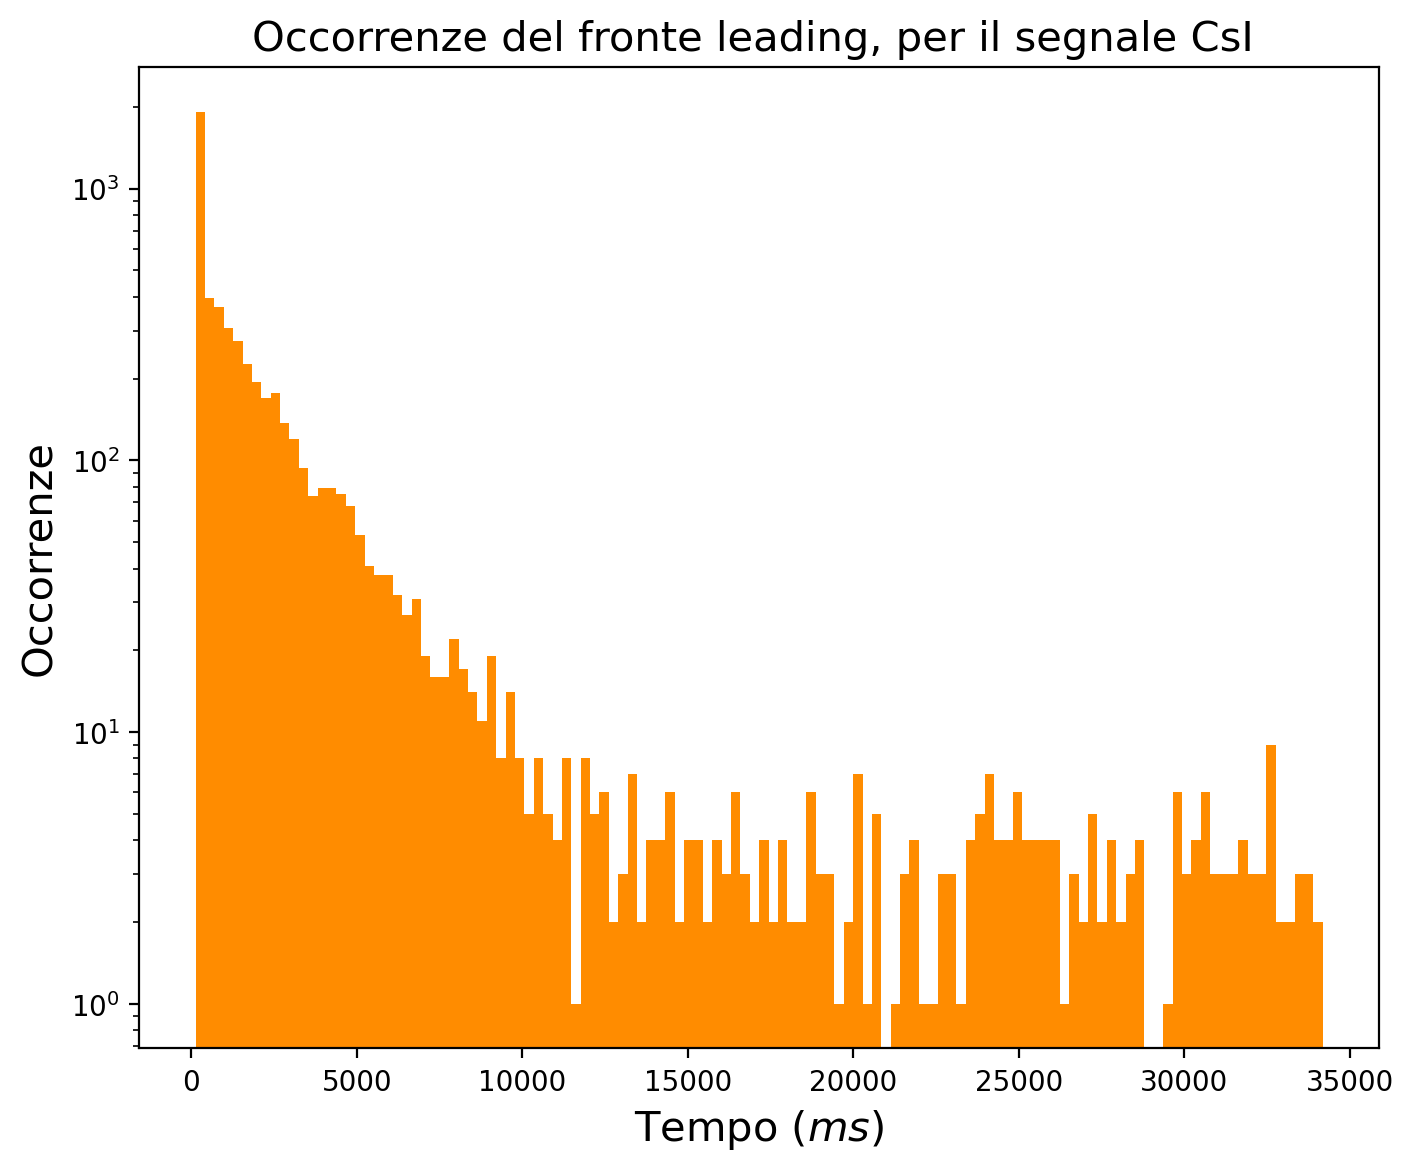

In [191]:
plt.figure(figsize=(8,6.5), dpi = 200)
csi = frontselect([i for i in dict_tot[3]],0)
plt.xlabel("Tempo ($ms$)", fontsize = 15)
plt.ylabel("Occorrenze", fontsize = 15)
ycsi,xcsi, ocsi = plt.hist([i[3] for i in csi], bins =120, color = "darkorange")
plt.yscale("log")
plt.title("Occorrenze del fronte leading, per il segnale CsI ", fontsize = 15)



Adesso seleziono solo i csi sotto i 10, e vediamo quanto rappresentano del totale


1277.0680695525473

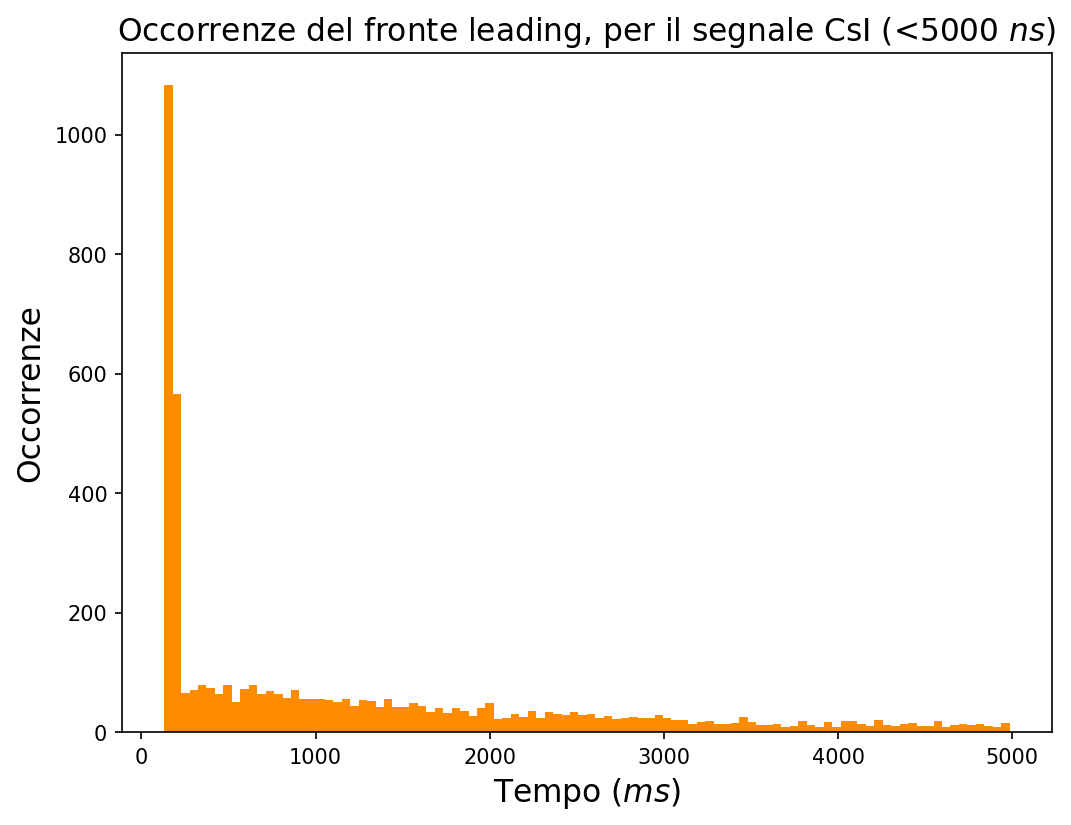

In [192]:
csi_selected = []
lim = 5000
for i in csi:
    if i[3]<lim:
        csi_selected.append(i[3])
plt.figure(figsize=(8,6), dpi = 150)
csisy, csix, otcsh= plt.hist(csi_selected, color = "darkorange", bins = 100)
plt.xlabel("Tempo ($ms$)", fontsize = 15)
plt.ylabel("Occorrenze", fontsize = 15)
plt.title("Occorrenze del fronte leading, per il segnale CsI (<"+str(lim)+" $ns$)", fontsize = 15)

np.std(csi_selected)

In [190]:
sum(csisy)/sum(ycsi)

0.8701914311759343

Insomma il 99% degli eventi è sotto i 10. 

## Down scint

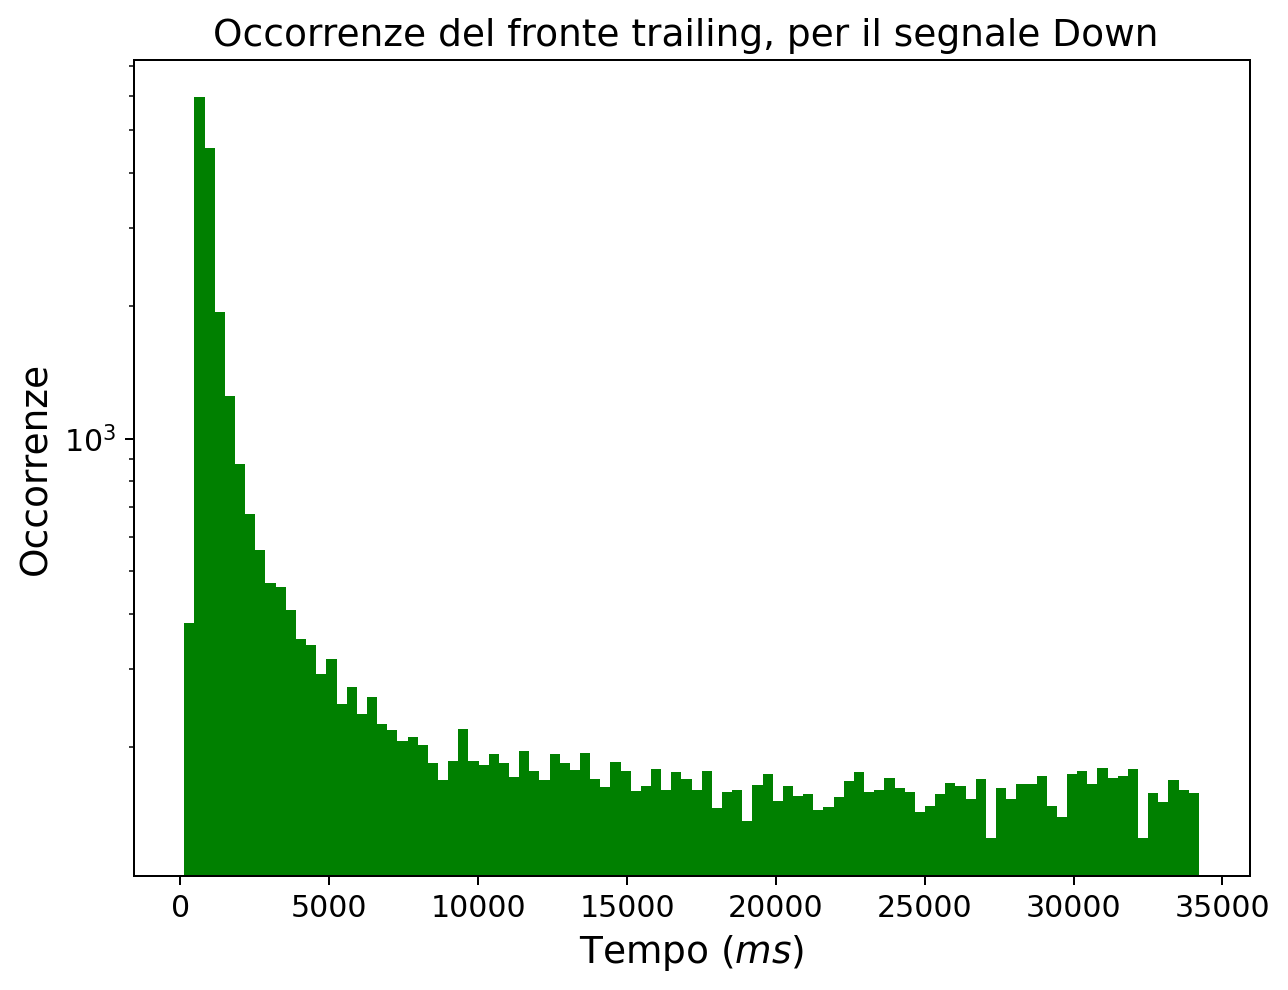

In [229]:
plt.figure(figsize=(8,6), dpi = 180)
downs= frontselect([i for i in dict_tot[4]],1)

ydw,xdw, odw = plt.hist([i[3] for i in downs], bins =100, color = "green")
plt.title("Occorrenze del fronte trailing, per il segnale Down ", fontsize = 15)

plt.yscale("log")
plt.xlabel("Tempo ($ms$)", fontsize = 15)
plt.ylabel("Occorrenze", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Text(0.5, 1.0, 'Occorrenze del fronte trailing, per il segnale Down (<10000 $ns$)')

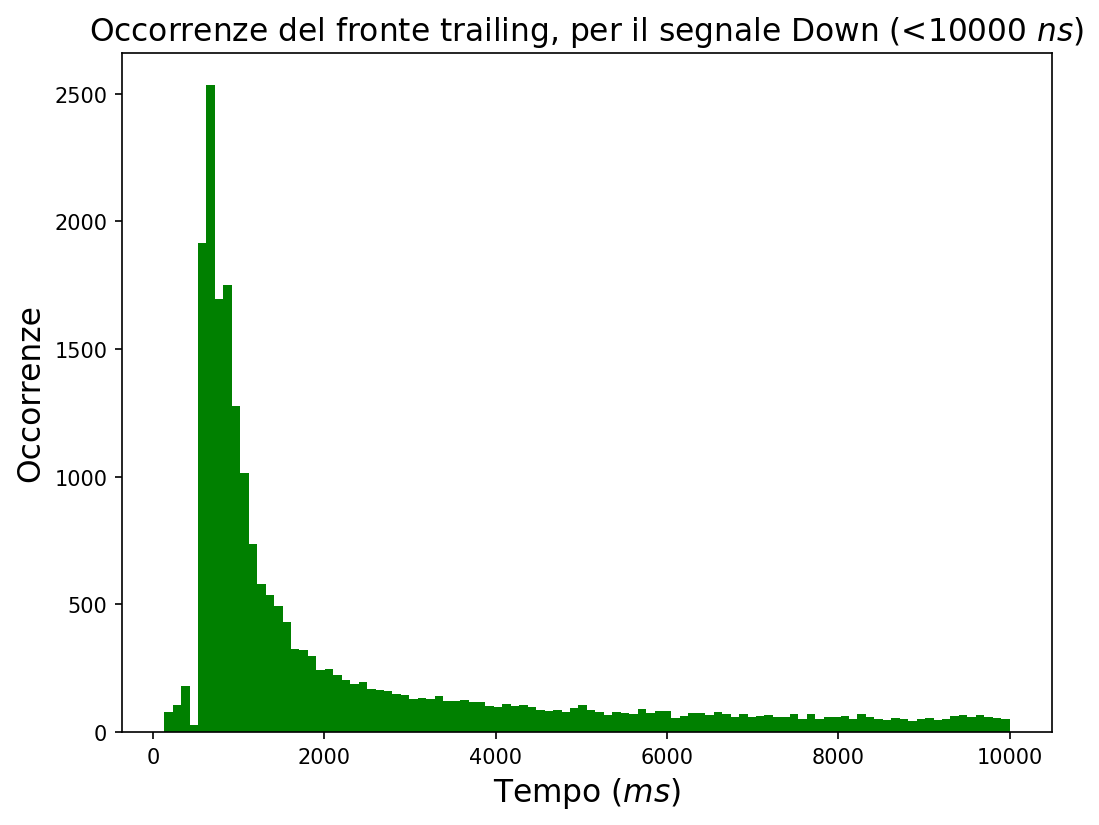

In [230]:
dw_selected = []
lim = 10000
for i in downs:
    if i[3]<lim:
        dw_selected.append(i[3])
plt.figure(figsize=(8,6), dpi = 150)
dwsy, dwx, otcsh= plt.hist(dw_selected, color = "green", bins = 100)
plt.xlabel("Tempo ($ms$)", fontsize = 15)
plt.ylabel("Occorrenze", fontsize = 15)
plt.title("Occorrenze del fronte trailing, per il segnale Down (<"+str(lim)+" $ns$)", fontsize = 15)


In [231]:
sum(dwsy)/sum(ydw)

0.652055857253685

##### ydw,xdw, odw = plt.hist([i[3] for i in dict_tot[4]], bins =80)
paramsd, covd = curve_fit(f = exp,xdata = xdw[0:(len(xdw)-1)],ydata = ydw, p0 = (70,2000,0))
modeld = [exp(i, *paramsd) for i in xdw]
plt.plot(xdw, modeld)

In [202]:
paramsd

array([10226.32644682,  1224.54653851,   412.45393541])

## Analisi delle coincidenze

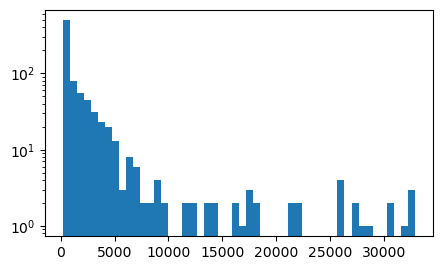

In [204]:

plt.figure(figsize=(5,3), dpi = 100)
coinc_100 = []
for i in dict_tot[6]:
    if i[2]==0:
       coinc_100.append 
plt.yscale("log")
y6,x6, o6 = plt.hist([i[3] for i in dict_tot[6]], bins = 50)
params6, cov6 = curve_fit(f = exp,xdata = x6[0:(len(x6)-1)],ydata = y6, p0 = (70,2000,0))


In [155]:
y6

array([13.,  5.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
        0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.])

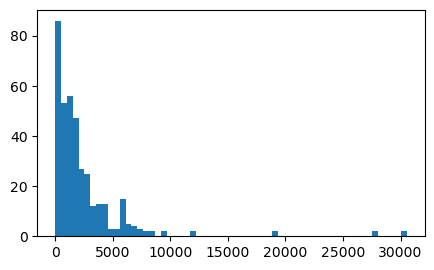

In [156]:
plt.figure(figsize=(5,3), dpi = 100)
ys, xs , other= plt.hist([i[3] for i in dict_tot[8]], bins = 60)
params, cov = curve_fit(f = exp,xdata = xs[0:(len(xs)-1)],ydata = ys, p0 = (70,2000,0))
model = [exp(i, *params) for i in xs]

### 01X


In [157]:
canale_8 =[]
for i in dict_tot[8]:
    if i[2] ==0:
        canale_8.append(i[3])

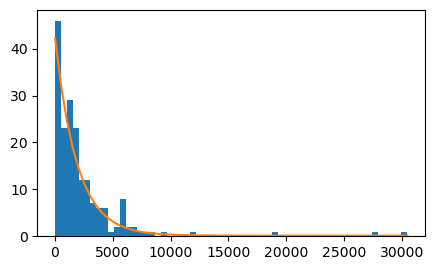

In [158]:
plt.figure(figsize=(5,3), dpi = 100)
ys, xs , other= plt.hist(canale_8, bins = 60)
params, cov = curve_fit(f = exp,xdata = xs[0:60],ydata = ys, p0 = (70,2000,0))
model = [exp(i, *params) for i in xs]

plt.plot(xs,model)

In [159]:
params

array([4.23248500e+01, 1.88834632e+03, 1.39525898e-01])

In [160]:
cov

array([[ 2.28401002e+00, -9.44921866e+01, -3.01176388e-02],
       [-9.44921866e+01,  1.35165533e+04, -1.20270649e+01],
       [-3.01176388e-02, -1.20270649e+01,  7.51243874e-02]])

In [163]:
coinc_01x =frontselect(dict_tot[8])
dw_s = frontselect(dict_tot[4])
nevents_down = [i[0] for i in dw_s]
coinc_010 =[]
coinc_011 = []
for i in coinc_01x:
    if i[0] in nevents_down:
        print(i[0])
        coinc_011.append(i)
    else:
        coinc_010.append(i)

2366
4593
5352
6333
9815
10015
12264
13457
17022
17650
18426
19514
21442
26583
26998
27246


In [164]:
dw_s 

[[32, 4, 0, 6612],
 [34, 4, 0, 29683],
 [52, 4, 0, 17865],
 [58, 4, 0, 1595],
 [69, 4, 0, 351],
 [69, 4, 0, 1218],
 [95, 4, 0, 22393],
 [143, 4, 0, 30256],
 [160, 4, 0, 22798],
 [174, 4, 0, 75],
 [183, 4, 0, 4379],
 [202, 4, 0, 224],
 [227, 4, 0, 28083],
 [229, 4, 0, 2889],
 [266, 4, 0, 412],
 [285, 4, 0, 3648],
 [319, 4, 0, 291],
 [380, 4, 0, 27121],
 [382, 4, 0, 3585],
 [410, 4, 0, 1545],
 [422, 4, 0, 17787],
 [426, 4, 0, 10840],
 [468, 4, 0, 15200],
 [492, 4, 0, 1517],
 [506, 4, 0, 956],
 [519, 4, 0, 16391],
 [537, 4, 0, 17409],
 [544, 4, 0, 6324],
 [571, 4, 0, 4026],
 [591, 4, 0, 7499],
 [595, 4, 0, 26257],
 [627, 4, 0, 5579],
 [628, 4, 0, 2593],
 [629, 4, 0, 12532],
 [635, 4, 0, 2672],
 [648, 4, 0, 11973],
 [649, 4, 0, 18128],
 [650, 4, 0, 31810],
 [671, 4, 0, 13290],
 [681, 4, 0, 561],
 [693, 4, 0, 17375],
 [730, 4, 0, 32254],
 [757, 4, 0, 1390],
 [781, 4, 0, 389],
 [790, 4, 0, 5725],
 [793, 4, 0, 31528],
 [801, 4, 0, 5037],
 [820, 4, 0, 1252],
 [827, 4, 0, 591],
 [838, 4, 0, 109

(array([11.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([  177. ,  3207.4,  6237.8,  9268.2, 12298.6, 15329. , 18359.4,
        21389.8, 24420.2, 27450.6, 30481. ]),
 <BarContainer object of 10 artists>)

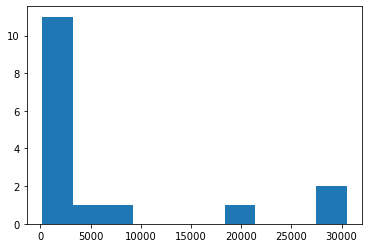

In [166]:
plt.hist([i[3] for  i in coinc_011])